In [18]:
# Importing necessary libraries for data handling, visualization, and machine learning

## Data Handling
import pandas as pd
import numpy as np

## Text Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.preprocessing import LabelEncoder

## Model Training & Evaluation
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Libraries for Natural Language Processing (NLP)
import nltk

# Confirming that libraries have been imported successfully
print("Libraries have been imported successfully.")

Libraries have been imported successfully.


In [20]:
# Loading the new dataset
file_path_new = "Customer_Reviews_Analysis.csv"
df_new_sentiment = pd.read_csv(file_path_new)

# Displaying basic information about the dataset
df_new_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product       1010 non-null   object
 1   Brand         1010 non-null   object
 2   Category      1010 non-null   object
 3   Review Date   1010 non-null   object
 4   Review Text   1010 non-null   object
 5   Review Title  1010 non-null   object
 6   Rating        1010 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 55.4+ KB


In [22]:
# Showing the first few rows to understand its structure
df_new_sentiment.head()

,Product,Brand,Category,Review Date,Review Text,Review Title,Rating
0,Gaming Headset,Razer,Electronics,2023-09-19,This product has been amazing. I use it every ...,"Meh, just okay",3
1,Wireless Keyboard,Logitech,Accessories,2023-02-16,Does the job but not as well as I had hoped. C...,Not worth it,2
2,Robot Vacuum,iRobot,Home Appliances,2022-01-04,Very pleased with this! Works as expected and ...,"Meh, just okay",4
3,Espresso Machine,Breville,Home Appliances,2022-03-14,This exceeded my expectations! The design and ...,Exceeded my expectations,5
4,Wireless Keyboard,Logitech,Accessories,2023-07-27,"Terrible build quality, not recommended at all...",Very disappointed,4


In [24]:
# Checking for missing values in the dataset
missing_values = df_new_sentiment.isnull().sum()

# Displaying the count of missing values per column
missing_values

Product         0
Brand           0
Category        0
Review Date     0
Review Text     0
Review Title    0
Rating          0
dtype: int64

In [30]:
df_new_sentiment["Sentiment"] = df_new_sentiment["Rating"].apply(lambda x: "Positive" if x >= 4 else "Negative")

# Check the distribution of sentiments
df_new_sentiment["Sentiment"].value_counts()

Sentiment
Negative    614
Positive    396
Name: count, dtype: int64

/var/folders/8y/6pzdp0tn1dg7n4p8fh2sjk8m0000gn/T/ipykernel_15551/2507586783.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_new_sentiment["Sentiment"], palette="viridis")


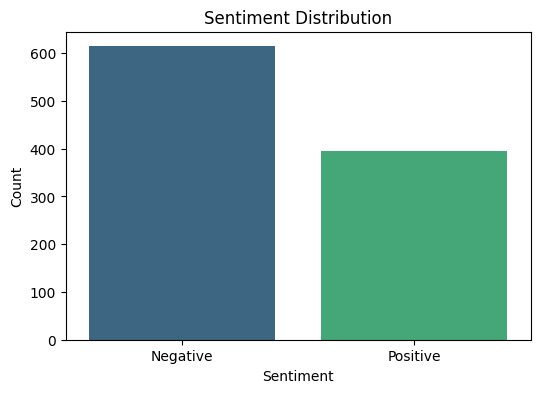

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df_new_sentiment["Sentiment"], palette="viridis")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

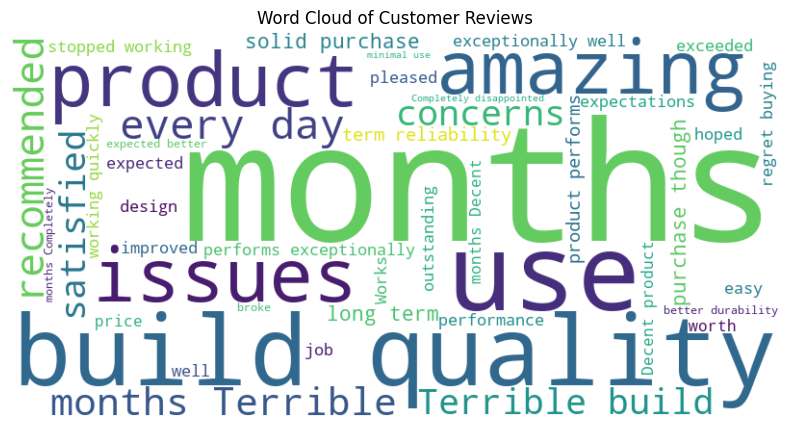

In [34]:
from wordcloud import WordCloud

# Combine all review texts into a single string
all_reviews_text = " ".join(df_new_sentiment["Review Text"].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Customer Reviews")
plt.show()

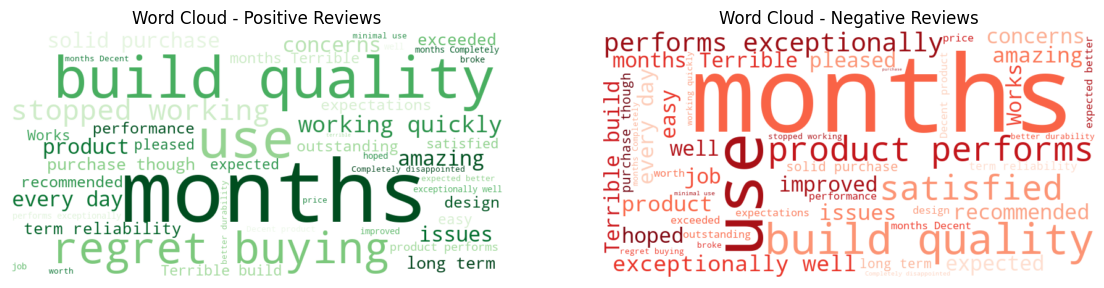

In [55]:
# Generating word clouds separately for positive and negative reviews
positive_reviews_text = " ".join(df_new_sentiment[df_new_sentiment["Sentiment"] == "Positive"]["Review Text"].dropna())
negative_reviews_text = " ".join(df_new_sentiment[df_new_sentiment["Sentiment"] == "Negative"]["Review Text"].dropna())

# Creating word clouds
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap="Greens").generate(positive_reviews_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', colormap="Reds").generate(negative_reviews_text)

# Plotting both word clouds side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Positive word cloud
axes[0].imshow(wordcloud_positive, interpolation='bilinear')
axes[0].axis("off")
axes[0].set_title("Word Cloud - Positive Reviews")

# Negative word cloud
axes[1].imshow(wordcloud_negative, interpolation='bilinear')
axes[1].axis("off")
axes[1].set_title("Word Cloud - Negative Reviews")

plt.show()

/var/folders/8y/6pzdp0tn1dg7n4p8fh2sjk8m0000gn/T/ipykernel_15551/2379754535.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_positive_freq["Word"], x=df_positive_freq["Count"], palette="Blues_r", ax=axes[0])
/var/folders/8y/6pzdp0tn1dg7n4p8fh2sjk8m0000gn/T/ipykernel_15551/2379754535.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_negative_freq["Word"], x=df_negative_freq["Count"], palette="Reds_r", ax=axes[1])


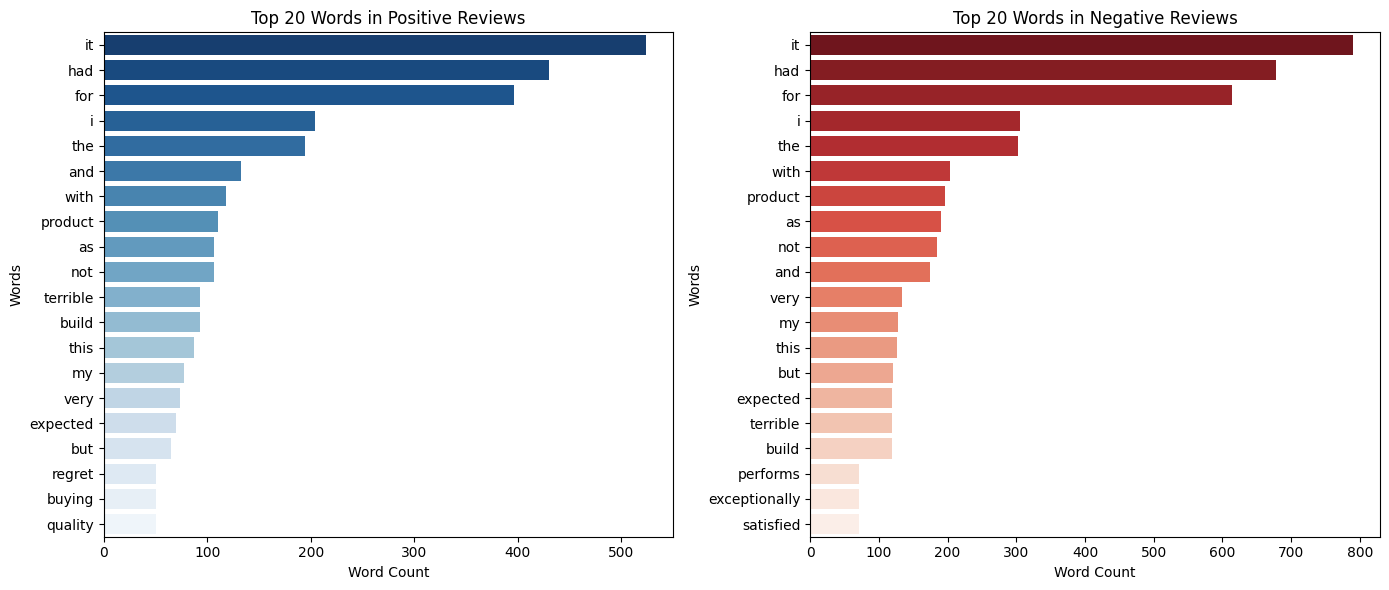

In [57]:
from collections import Counter

# Tokenizing and counting words in positive and negative reviews
positive_words = [word.lower() for word in positive_reviews_text.split() if word.isalnum()]
negative_words = [word.lower() for word in negative_reviews_text.split() if word.isalnum()]

# Getting the 20 most common words in both categories
positive_word_counts = Counter(positive_words).most_common(20)
negative_word_counts = Counter(negative_words).most_common(20)

# Converting to DataFrame for visualization
df_positive_freq = pd.DataFrame(positive_word_counts, columns=["Word", "Count"])
df_negative_freq = pd.DataFrame(negative_word_counts, columns=["Word", "Count"])

# Plotting frequency distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Positive Words
sns.barplot(y=df_positive_freq["Word"], x=df_positive_freq["Count"], palette="Blues_r", ax=axes[0])
axes[0].set_title("Top 20 Words in Positive Reviews")
axes[0].set_xlabel("Word Count")
axes[0].set_ylabel("Words")

# Negative Words
sns.barplot(y=df_negative_freq["Word"], x=df_negative_freq["Count"], palette="Reds_r", ax=axes[1])
axes[1].set_title("Top 20 Words in Negative Reviews")
axes[1].set_xlabel("Word Count")
axes[1].set_ylabel("Words")

plt.tight_layout()
plt.show()

/var/folders/8y/6pzdp0tn1dg7n4p8fh2sjk8m0000gn/T/ipykernel_15551/3931497292.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_positive_bigrams["Bigram"], x=df_positive_bigrams["Count"], palette="Blues_r", ax=axes[0])
/var/folders/8y/6pzdp0tn1dg7n4p8fh2sjk8m0000gn/T/ipykernel_15551/3931497292.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_negative_bigrams["Bigram"], x=df_negative_bigrams["Count"], palette="Reds_r", ax=axes[1])


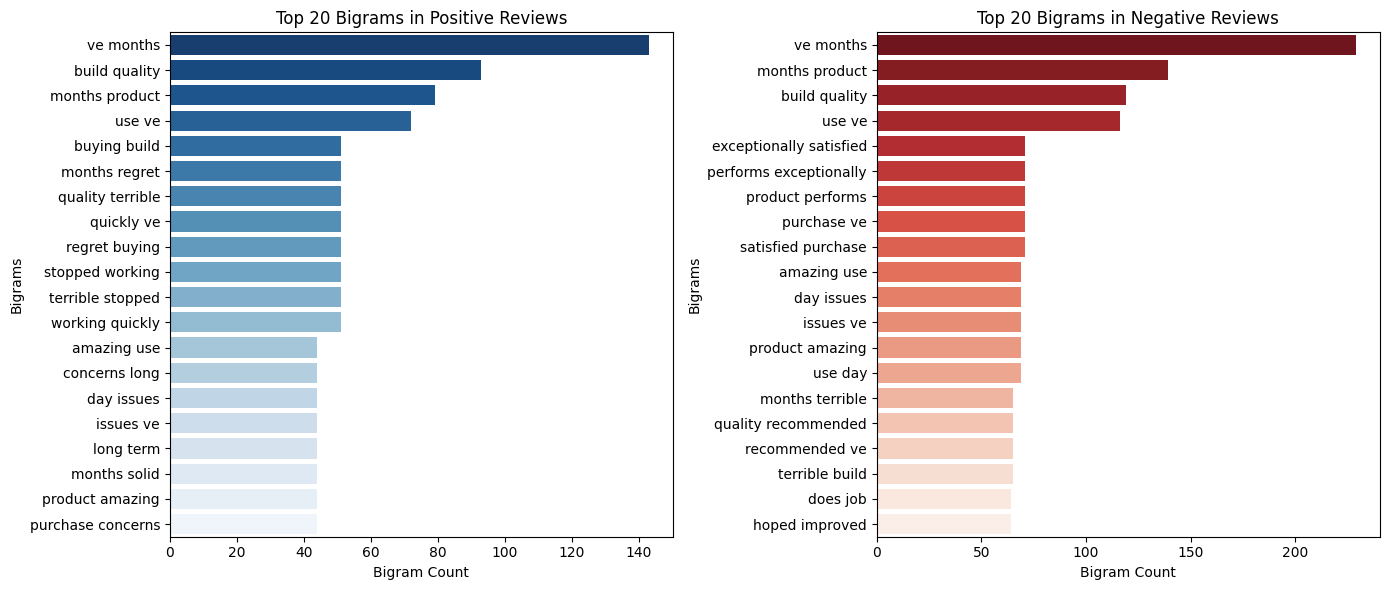

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to extract top bigrams
def get_top_bigrams(text, n=20):
    vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words="english")
    bigram_matrix = vectorizer.fit_transform([text])
    bigram_counts = bigram_matrix.toarray().sum(axis=0)
    
    bigram_freq = list(zip(vectorizer.get_feature_names_out(), bigram_counts))
    bigram_freq = sorted(bigram_freq, key=lambda x: x[1], reverse=True)[:n]
    
    return pd.DataFrame(bigram_freq, columns=["Bigram", "Count"])

# Extracting top bigrams for positive and negative reviews
df_positive_bigrams = get_top_bigrams(positive_reviews_text)
df_negative_bigrams = get_top_bigrams(negative_reviews_text)

# Plotting bigram distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Positive Review Bigrams
sns.barplot(y=df_positive_bigrams["Bigram"], x=df_positive_bigrams["Count"], palette="Blues_r", ax=axes[0])
axes[0].set_title("Top 20 Bigrams in Positive Reviews")
axes[0].set_xlabel("Bigram Count")
axes[0].set_ylabel("Bigrams")

# Negative Review Bigrams
sns.barplot(y=df_negative_bigrams["Bigram"], x=df_negative_bigrams["Count"], palette="Reds_r", ax=axes[1])
axes[1].set_title("Top 20 Bigrams in Negative Reviews")
axes[1].set_xlabel("Bigram Count")
axes[1].set_ylabel("Bigrams")

plt.tight_layout()
plt.show()

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# Encoding the Sentiment Labels (Positive = 1, Negative = 0)
label_encoder = LabelEncoder()
df_new_sentiment["Sentiment Label"] = label_encoder.fit_transform(df_new_sentiment["Sentiment"])

# Creating a Pipeline for Text Preprocessing & Feature Extraction (TF-IDF)
pipeline_tfidf = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words="english", max_features=1000))
])

# Applying TF-IDF transformation
X = pipeline_tfidf.fit_transform(df_new_sentiment["Review Text"])
y = df_new_sentiment["Sentiment Label"]

# Splitting the dataset (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirming preprocessing completion
print("Text preprocessing and feature extraction completed successfully!")

Text preprocessing and feature extraction completed successfully!


In [65]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Training Naïve Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Making Predictions
y_pred_nb = nb_model.predict(X_test)
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]  # Probability for ROC Curve

# Evaluating Performance
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

print(f"Naïve Bayes Accuracy: {accuracy_nb:.2f}")
print("Classification Report - Naïve Bayes:\n", classification_rep_nb)

Naïve Bayes Accuracy: 0.61
Classification Report - Naïve Bayes:
               precision    recall  f1-score   support

           0       0.63      0.91      0.74       126
           1       0.42      0.11      0.17        76

    accuracy                           0.61       202
   macro avg       0.52      0.51      0.46       202
weighted avg       0.55      0.61      0.53       202



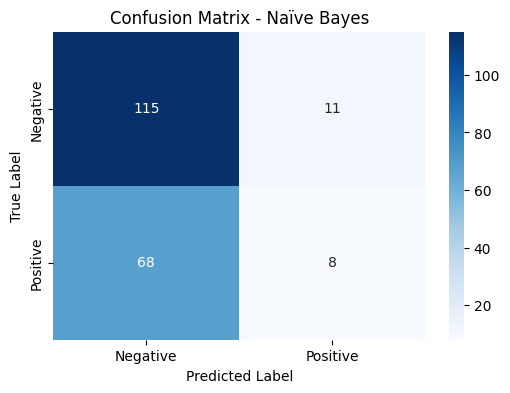

In [67]:
# Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Plotting Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Naïve Bayes")
plt.show()

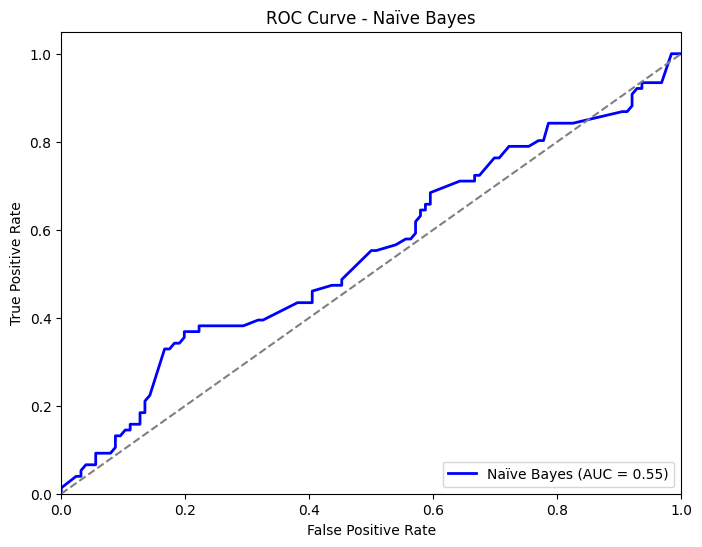

In [69]:
# Plotting ROC Curve
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color="blue", lw=2, label=f"Naïve Bayes (AUC = {roc_auc_nb:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naïve Bayes")
plt.legend(loc="lower right")
plt.show()

# Storing Naïve Bayes results for comparison later
nb_results = {
    "accuracy": accuracy_nb,
    "classification_report": classification_rep_nb
}

In [71]:
# Training Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making Predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Probability for ROC Curve

# Evaluating Performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("Classification Report - Random Forest:\n", classification_rep_rf)

Random Forest Accuracy: 0.58
Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.63      0.79      0.70       126
           1       0.41      0.24      0.30        76

    accuracy                           0.58       202
   macro avg       0.52      0.52      0.50       202
weighted avg       0.55      0.58      0.55       202



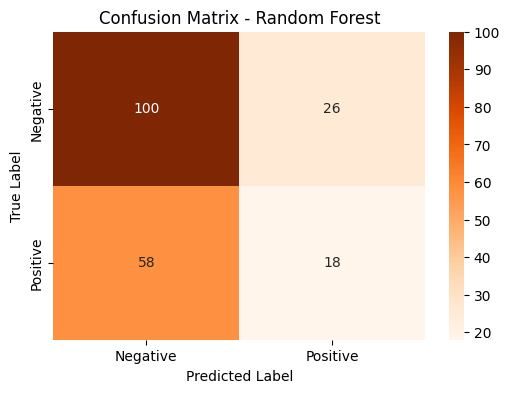

In [73]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Oranges', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

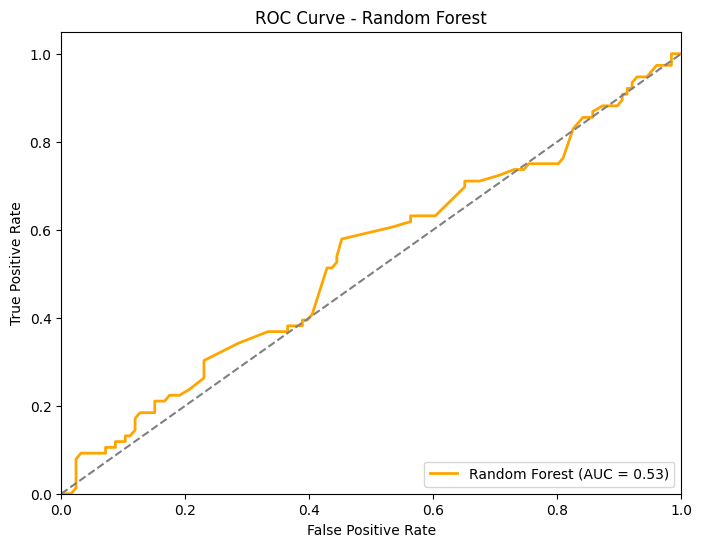

In [75]:
# Plotting ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color="orange", lw=2, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()

# Storing Random Forest results for comparison later
rf_results = {
    "accuracy": accuracy_rf,
    "classification_report": classification_rep_rf
}

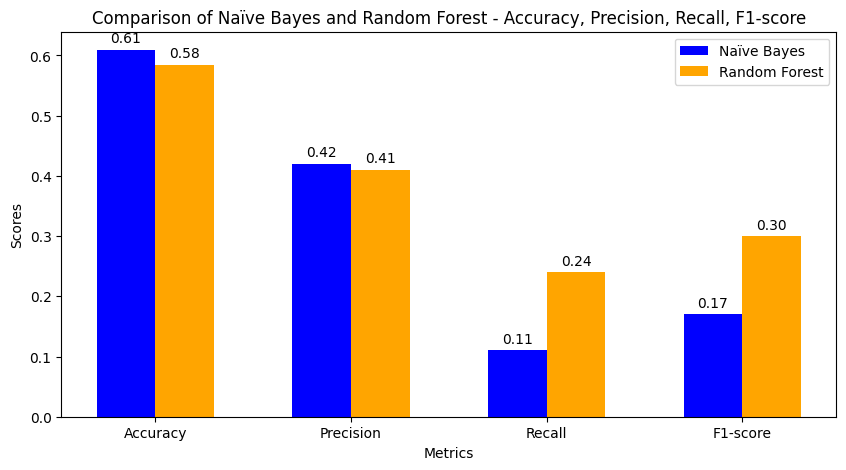

In [77]:
# Extracting F1-score, Precision, and Recall for both models
import numpy as np

nb_metrics = [accuracy_nb] + list(map(float, classification_rep_nb.split()[10:13]))  # Accuracy, Precision, Recall, F1-score
rf_metrics = [accuracy_rf] + list(map(float, classification_rep_rf.split()[10:13]))  # Accuracy, Precision, Recall, F1-score

labels = ["Accuracy", "Precision", "Recall", "F1-score"]

x = np.arange(len(labels))  # Label locations
width = 0.3  # Bar width

# Plotting bar chart
fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.bar(x - width/2, nb_metrics, width, label="Naïve Bayes", color="blue")
bars2 = ax.bar(x + width/2, rf_metrics, width, label="Random Forest", color="orange")

ax.set_xlabel("Metrics")
ax.set_ylabel("Scores")
ax.set_title("Comparison of Naïve Bayes and Random Forest - Accuracy, Precision, Recall, F1-score")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show values on top of bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom')

plt.show()

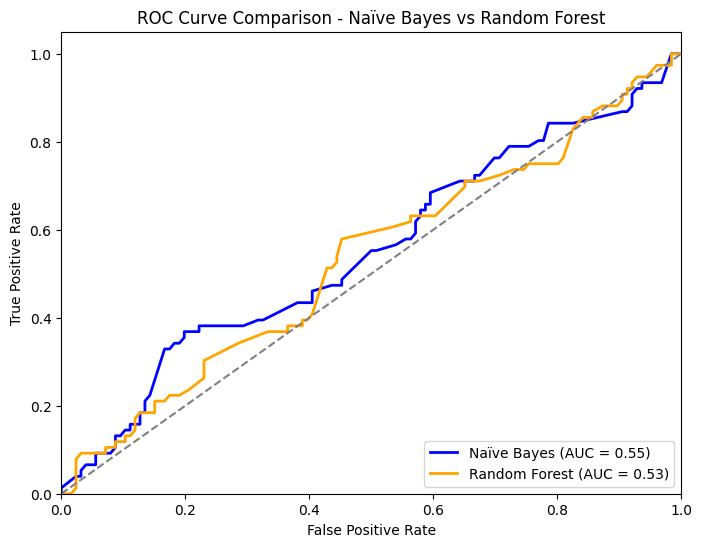

In [79]:
# Plotting ROC Curves for both models
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color="blue", lw=2, label=f"Naïve Bayes (AUC = {roc_auc_nb:.2f})")
plt.plot(fpr_rf, tpr_rf, color="orange", lw=2, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")

plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison - Naïve Bayes vs Random Forest")
plt.legend(loc="lower right")
plt.show()